In [3]:
import pandas as pd
df = pd.read_csv('housing.csv', delim_whitespace=True, header=None)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2



Epoch 00001: val_loss improved from inf to 502.33182, saving model to ./model\01-502.3318.hdf5

Epoch 00002: val_loss improved from 502.33182 to 371.73813, saving model to ./model\02-371.7381.hdf5

Epoch 00003: val_loss improved from 371.73813 to 230.30362, saving model to ./model\03-230.3036.hdf5

Epoch 00004: val_loss improved from 230.30362 to 119.47206, saving model to ./model\04-119.4721.hdf5

Epoch 00005: val_loss improved from 119.47206 to 81.96114, saving model to ./model\05-81.9611.hdf5

Epoch 00006: val_loss did not improve from 81.96114

Epoch 00007: val_loss improved from 81.96114 to 77.91287, saving model to ./model\07-77.9129.hdf5

Epoch 00008: val_loss improved from 77.91287 to 64.64534, saving model to ./model\08-64.6453.hdf5

Epoch 00009: val_loss improved from 64.64534 to 47.82159, saving model to ./model\09-47.8216.hdf5

Epoch 00010: val_loss did not improve from 47.82159

Epoch 00011: val_loss did not improve from 47.82159

Epoch 00012: val_loss improved from 47.82


Epoch 00121: val_loss improved from 18.99117 to 18.57031, saving model to ./model\121-18.5703.hdf5

Epoch 00122: val_loss improved from 18.57031 to 18.06447, saving model to ./model\122-18.0645.hdf5

Epoch 00123: val_loss did not improve from 18.06447

Epoch 00124: val_loss improved from 18.06447 to 17.95004, saving model to ./model\124-17.9500.hdf5

Epoch 00125: val_loss did not improve from 17.95004

Epoch 00126: val_loss improved from 17.95004 to 17.42263, saving model to ./model\126-17.4226.hdf5

Epoch 00127: val_loss improved from 17.42263 to 17.38688, saving model to ./model\127-17.3869.hdf5

Epoch 00128: val_loss did not improve from 17.38688

Epoch 00129: val_loss did not improve from 17.38688

Epoch 00130: val_loss did not improve from 17.38688

Epoch 00131: val_loss did not improve from 17.38688

Epoch 00132: val_loss did not improve from 17.38688

Epoch 00133: val_loss did not improve from 17.38688

Epoch 00134: val_loss did not improve from 17.38688

Epoch 00135: val_loss 

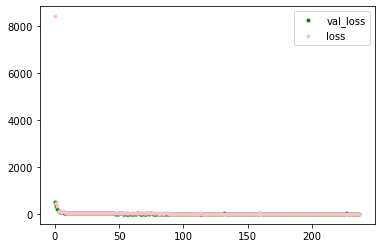

실제가격 : 24.5000, 예상가격 : 20.8833
실제가격 : 14.1000, 예상가격 : 14.6009
실제가격 : 34.7000, 예상가격 : 31.9749
실제가격 : 24.3000, 예상가격 : 20.8464
실제가격 : 15.6000, 예상가격 : 9.6229
실제가격 : 23.9000, 예상가격 : 22.3500
실제가격 : 41.3000, 예상가격 : 30.5344
실제가격 : 18.9000, 예상가격 : 21.8565
실제가격 : 50.0000, 예상가격 : 45.7458
실제가격 : 23.9000, 예상가격 : 22.8490


In [46]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

from tensorflow.keras import optimizers # lr 조정할때 쓰임
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import pandas as pd

np.random.seed(0)
tf.random.set_seed(0)
df = df.sample(frac=1)
dataset = df.values 

x = dataset[:,:13]
y = dataset[:,13]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

# 모델 학습과정 설정
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.01))

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

#모델저장조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1,save_best_only = True)

history = model.fit(x_train, y_train, validation_split=0.33, epochs=3500, batch_size=50, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])
# 값찍어보려고 아래 두줄 만들어봄
hist = pd.DataFrame(history.history)
print(hist.tail())

#테스트셋으로 실험 오차값 저장
y_loss = history.history['loss']
#학습셋으로 정확도 값 저장
y_vloss = history.history['val_loss']
#x값을 지저앟고 정확도를 파란색, 오차를 빨간색
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="green", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="pink", markersize=3, label='loss')
plt.legend()
plt.show()

y_predict = model.predict(x_test).flatten() # 값을 flatten으로 균일하게 넣는다.

for i in range(10):
    label = y_test[i]
    prediction = y_predict[i]
    print("실제가격 : %.4f, 예상가격 : %.4f" %(label, prediction))

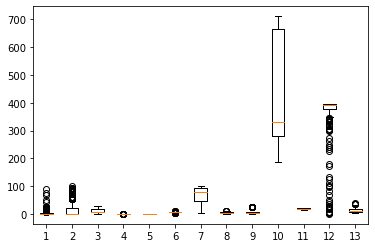


Epoch 00001: val_loss improved from inf to 474.06781, saving model to .model\01-474.0678.hdf5

Epoch 00002: val_loss improved from 474.06781 to 132.33347, saving model to .model\02-132.3335.hdf5

Epoch 00003: val_loss improved from 132.33347 to 116.02273, saving model to .model\03-116.0227.hdf5

Epoch 00004: val_loss improved from 116.02273 to 102.92661, saving model to .model\04-102.9266.hdf5

Epoch 00005: val_loss improved from 102.92661 to 86.14708, saving model to .model\05-86.1471.hdf5

Epoch 00006: val_loss improved from 86.14708 to 74.02625, saving model to .model\06-74.0263.hdf5

Epoch 00007: val_loss improved from 74.02625 to 70.34840, saving model to .model\07-70.3484.hdf5

Epoch 00008: val_loss did not improve from 70.34840

Epoch 00009: val_loss did not improve from 70.34840

Epoch 00010: val_loss did not improve from 70.34840

Epoch 00011: val_loss did not improve from 70.34840

Epoch 00012: val_loss did not improve from 70.34840

Epoch 00013: val_loss improved from 70.34


Epoch 00131: val_loss did not improve from 34.56905

Epoch 00132: val_loss did not improve from 34.56905

Epoch 00133: val_loss did not improve from 34.56905

Epoch 00134: val_loss did not improve from 34.56905

Epoch 00135: val_loss did not improve from 34.56905

Epoch 00136: val_loss did not improve from 34.56905

Epoch 00137: val_loss did not improve from 34.56905

Epoch 00138: val_loss did not improve from 34.56905

Epoch 00139: val_loss did not improve from 34.56905

Epoch 00140: val_loss did not improve from 34.56905

Epoch 00141: val_loss did not improve from 34.56905

Epoch 00142: val_loss did not improve from 34.56905

Epoch 00143: val_loss did not improve from 34.56905

Epoch 00144: val_loss improved from 34.56905 to 34.08656, saving model to .model\144-34.0866.hdf5

Epoch 00145: val_loss improved from 34.08656 to 33.97792, saving model to .model\145-33.9779.hdf5

Epoch 00146: val_loss did not improve from 33.97792

Epoch 00147: val_loss did not improve from 33.97792

Epoch 


Epoch 00288: val_loss did not improve from 27.18533

Epoch 00289: val_loss did not improve from 27.18533

Epoch 00290: val_loss did not improve from 27.18533

Epoch 00291: val_loss did not improve from 27.18533

Epoch 00292: val_loss did not improve from 27.18533

Epoch 00293: val_loss did not improve from 27.18533

Epoch 00294: val_loss did not improve from 27.18533

Epoch 00295: val_loss improved from 27.18533 to 26.74979, saving model to .model\295-26.7498.hdf5

Epoch 00296: val_loss did not improve from 26.74979

Epoch 00297: val_loss did not improve from 26.74979

Epoch 00298: val_loss did not improve from 26.74979

Epoch 00299: val_loss did not improve from 26.74979

Epoch 00300: val_loss did not improve from 26.74979

Epoch 00301: val_loss did not improve from 26.74979

Epoch 00302: val_loss did not improve from 26.74979

Epoch 00303: val_loss did not improve from 26.74979

Epoch 00304: val_loss did not improve from 26.74979

Epoch 00305: val_loss did not improve from 26.74979



Epoch 00438: val_loss did not improve from 21.63583

Epoch 00439: val_loss did not improve from 21.63583

Epoch 00440: val_loss did not improve from 21.63583

Epoch 00441: val_loss did not improve from 21.63583

Epoch 00442: val_loss did not improve from 21.63583

Epoch 00443: val_loss did not improve from 21.63583

Epoch 00444: val_loss did not improve from 21.63583

Epoch 00445: val_loss did not improve from 21.63583

Epoch 00446: val_loss did not improve from 21.63583

Epoch 00447: val_loss did not improve from 21.63583

Epoch 00448: val_loss did not improve from 21.63583

Epoch 00449: val_loss did not improve from 21.63583

Epoch 00450: val_loss did not improve from 21.63583

Epoch 00451: val_loss did not improve from 21.63583

Epoch 00452: val_loss did not improve from 21.63583

Epoch 00453: val_loss did not improve from 21.63583

Epoch 00454: val_loss did not improve from 21.63583

Epoch 00455: val_loss did not improve from 21.63583

Epoch 00456: val_loss did not improve from 21


Epoch 00589: val_loss did not improve from 18.23966

Epoch 00590: val_loss did not improve from 18.23966

Epoch 00591: val_loss did not improve from 18.23966

Epoch 00592: val_loss did not improve from 18.23966

Epoch 00593: val_loss improved from 18.23966 to 17.96107, saving model to .model\593-17.9611.hdf5

Epoch 00594: val_loss did not improve from 17.96107

Epoch 00595: val_loss did not improve from 17.96107

Epoch 00596: val_loss did not improve from 17.96107

Epoch 00597: val_loss did not improve from 17.96107

Epoch 00598: val_loss did not improve from 17.96107

Epoch 00599: val_loss did not improve from 17.96107

Epoch 00600: val_loss did not improve from 17.96107

Epoch 00601: val_loss did not improve from 17.96107

Epoch 00602: val_loss did not improve from 17.96107

Epoch 00603: val_loss did not improve from 17.96107

Epoch 00604: val_loss did not improve from 17.96107

Epoch 00605: val_loss did not improve from 17.96107

Epoch 00606: val_loss did not improve from 17.96107



Epoch 00745: val_loss did not improve from 16.68425

Epoch 00746: val_loss did not improve from 16.68425

Epoch 00747: val_loss did not improve from 16.68425

Epoch 00748: val_loss did not improve from 16.68425

Epoch 00749: val_loss did not improve from 16.68425

Epoch 00750: val_loss did not improve from 16.68425

Epoch 00751: val_loss did not improve from 16.68425

Epoch 00752: val_loss did not improve from 16.68425

Epoch 00753: val_loss did not improve from 16.68425

Epoch 00754: val_loss did not improve from 16.68425

Epoch 00755: val_loss did not improve from 16.68425

Epoch 00756: val_loss did not improve from 16.68425

Epoch 00757: val_loss did not improve from 16.68425

Epoch 00758: val_loss did not improve from 16.68425

Epoch 00759: val_loss did not improve from 16.68425

Epoch 00760: val_loss did not improve from 16.68425

Epoch 00761: val_loss did not improve from 16.68425

Epoch 00762: val_loss did not improve from 16.68425

Epoch 00763: val_loss did not improve from 16


Epoch 00899: val_loss did not improve from 15.55790

Epoch 00900: val_loss did not improve from 15.55790

Epoch 00901: val_loss did not improve from 15.55790

Epoch 00902: val_loss did not improve from 15.55790

Epoch 00903: val_loss did not improve from 15.55790

Epoch 00904: val_loss did not improve from 15.55790

Epoch 00905: val_loss did not improve from 15.55790

Epoch 00906: val_loss did not improve from 15.55790

Epoch 00907: val_loss did not improve from 15.55790

Epoch 00908: val_loss improved from 15.55790 to 15.35528, saving model to .model\908-15.3553.hdf5

Epoch 00909: val_loss did not improve from 15.35528

Epoch 00910: val_loss did not improve from 15.35528

Epoch 00911: val_loss did not improve from 15.35528

Epoch 00912: val_loss did not improve from 15.35528

Epoch 00913: val_loss did not improve from 15.35528

Epoch 00914: val_loss did not improve from 15.35528

Epoch 00915: val_loss did not improve from 15.35528

Epoch 00916: val_loss did not improve from 15.35528



Epoch 01055: val_loss did not improve from 14.66777

Epoch 01056: val_loss did not improve from 14.66777

Epoch 01057: val_loss did not improve from 14.66777

Epoch 01058: val_loss did not improve from 14.66777

Epoch 01059: val_loss did not improve from 14.66777

Epoch 01060: val_loss did not improve from 14.66777

Epoch 01061: val_loss did not improve from 14.66777

Epoch 01062: val_loss improved from 14.66777 to 14.56548, saving model to .model\1062-14.5655.hdf5

Epoch 01063: val_loss did not improve from 14.56548

Epoch 01064: val_loss did not improve from 14.56548

Epoch 01065: val_loss did not improve from 14.56548

Epoch 01066: val_loss did not improve from 14.56548

Epoch 01067: val_loss did not improve from 14.56548

Epoch 01068: val_loss did not improve from 14.56548

Epoch 01069: val_loss did not improve from 14.56548

Epoch 01070: val_loss did not improve from 14.56548

Epoch 01071: val_loss did not improve from 14.56548

Epoch 01072: val_loss did not improve from 14.56548


Epoch 01207: val_loss did not improve from 13.47080

Epoch 01208: val_loss did not improve from 13.47080

Epoch 01209: val_loss did not improve from 13.47080

Epoch 01210: val_loss did not improve from 13.47080

Epoch 01211: val_loss did not improve from 13.47080

Epoch 01212: val_loss did not improve from 13.47080

Epoch 01213: val_loss did not improve from 13.47080

Epoch 01214: val_loss did not improve from 13.47080

Epoch 01215: val_loss did not improve from 13.47080

Epoch 01216: val_loss did not improve from 13.47080

Epoch 01217: val_loss did not improve from 13.47080

Epoch 01218: val_loss did not improve from 13.47080

Epoch 01219: val_loss did not improve from 13.47080

Epoch 01220: val_loss did not improve from 13.47080

Epoch 01221: val_loss did not improve from 13.47080

Epoch 01222: val_loss did not improve from 13.47080

Epoch 01223: val_loss did not improve from 13.47080

Epoch 01224: val_loss did not improve from 13.47080

Epoch 01225: val_loss did not improve from 13

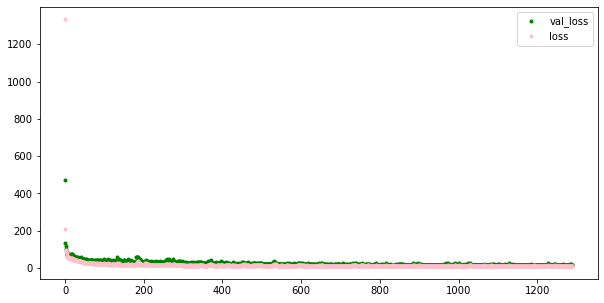

실제가격 : 19.3000, 예상가격 : 19.8353
실제가격 : 43.8000, 예상가격 : 33.5875
실제가격 : 23.0000, 예상가격 : 28.9221
실제가격 : 25.0000, 예상가격 : 26.3105
실제가격 : 18.9000, 예상가격 : 16.5803
실제가격 : 34.9000, 예상가격 : 40.1477
실제가격 : 21.7000, 예상가격 : 20.8562
실제가격 : 18.2000, 예상가격 : 17.1715
실제가격 : 18.2000, 예상가격 : 19.5970
실제가격 : 16.3000, 예상가격 : 14.5587


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)
plt.boxplot(x_train)
plt.show()

# 정규화#################
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test -= mean
x_test /= std

plt.boxplot(x_train)
plt.show()

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.01))

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

modelpath = '.model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1,save_best_only = True)

history = model.fit(x_train, y_train, validation_split=0.33, epochs=3500, batch_size=50, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])
hist = pd.DataFrame(history.history)

#테스트셋으로 실험 오차값 저장
y_loss = history.history['loss']
#학습셋으로 정확도 값 저장
y_vloss = history.history['val_loss']
#x값을 지저앟고 정확도를 파란색, 오차를 빨간색
x_len = np.arange(len(y_loss))
plt.figure(figsize=(10,5))
plt.plot(x_len, y_vloss, "o", c="green", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="pink", markersize=3, label='loss')
plt.legend()
plt.show()

y_predict = model.predict(x_test).flatten() # 값을 flatten으로 균일하게 넣는다.

for i in range(10):
    label = y_test[i]
    prediction = y_predict[i]
    print("실제가격 : %.4f, 예상가격 : %.4f" %(label, prediction))

2.9397498068056613


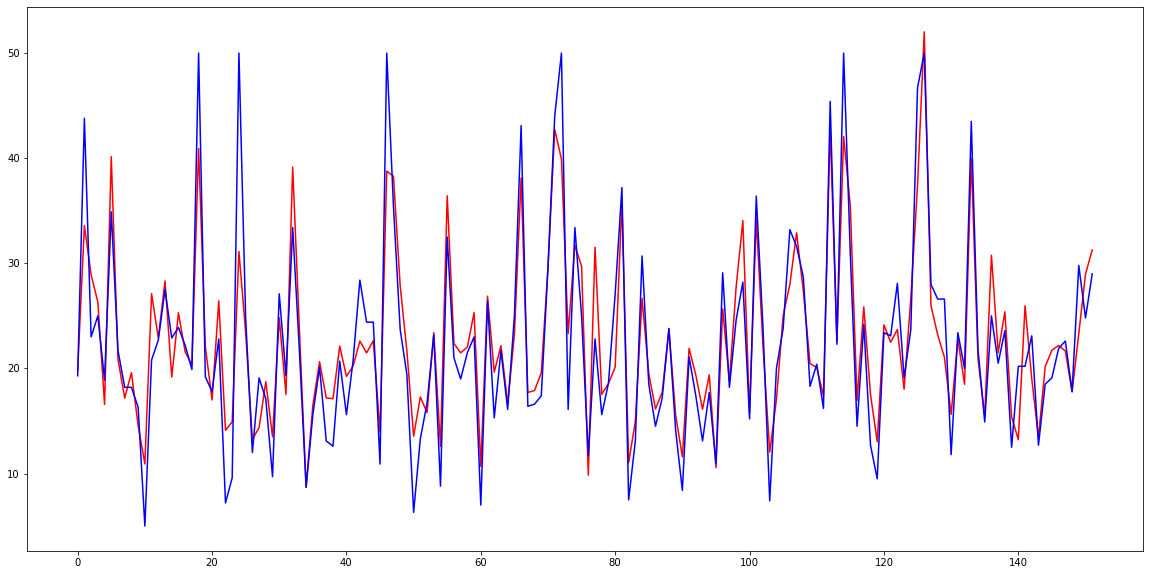

In [43]:
plt.figure(figsize=(20,10))
plt.plot(y_predict, c='red')
plt.plot(y_test, c='blue')

avr = abs(y_predict - y_test).mean()
print(avr)

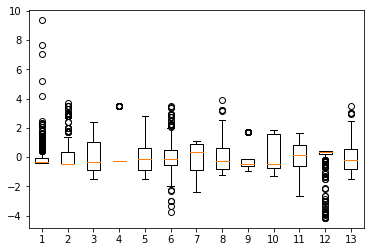


Epoch 00001: val_loss improved from inf to 578.49487, saving model to .model\01-578.4949.hdf5

Epoch 00002: val_loss improved from 578.49487 to 534.26166, saving model to .model\02-534.2617.hdf5

Epoch 00003: val_loss improved from 534.26166 to 458.75748, saving model to .model\03-458.7575.hdf5

Epoch 00004: val_loss improved from 458.75748 to 348.91733, saving model to .model\04-348.9173.hdf5

Epoch 00005: val_loss improved from 348.91733 to 219.48291, saving model to .model\05-219.4829.hdf5

Epoch 00006: val_loss improved from 219.48291 to 131.78609, saving model to .model\06-131.7861.hdf5

Epoch 00007: val_loss improved from 131.78609 to 127.31101, saving model to .model\07-127.3110.hdf5

Epoch 00008: val_loss improved from 127.31101 to 102.86379, saving model to .model\08-102.8638.hdf5

Epoch 00009: val_loss improved from 102.86379 to 57.97046, saving model to .model\09-57.9705.hdf5

Epoch 00010: val_loss improved from 57.97046 to 42.86937, saving model to .model\10-42.8694.hdf5




Epoch 00098: val_loss did not improve from 11.17111

Epoch 00099: val_loss did not improve from 11.17111

Epoch 00100: val_loss improved from 11.17111 to 11.14017, saving model to .model\100-11.1402.hdf5

Epoch 00101: val_loss did not improve from 11.14017

Epoch 00102: val_loss did not improve from 11.14017

Epoch 00103: val_loss improved from 11.14017 to 11.02598, saving model to .model\103-11.0260.hdf5

Epoch 00104: val_loss did not improve from 11.02598

Epoch 00105: val_loss did not improve from 11.02598

Epoch 00106: val_loss improved from 11.02598 to 10.97317, saving model to .model\106-10.9732.hdf5

Epoch 00107: val_loss did not improve from 10.97317

Epoch 00108: val_loss did not improve from 10.97317

Epoch 00109: val_loss did not improve from 10.97317

Epoch 00110: val_loss did not improve from 10.97317

Epoch 00111: val_loss did not improve from 10.97317

Epoch 00112: val_loss did not improve from 10.97317

Epoch 00113: val_loss did not improve from 10.97317

Epoch 00114: 


Epoch 00249: val_loss did not improve from 10.38958

Epoch 00250: val_loss did not improve from 10.38958

Epoch 00251: val_loss did not improve from 10.38958

Epoch 00252: val_loss did not improve from 10.38958

Epoch 00253: val_loss did not improve from 10.38958

Epoch 00254: val_loss did not improve from 10.38958

Epoch 00255: val_loss did not improve from 10.38958

Epoch 00256: val_loss did not improve from 10.38958

Epoch 00257: val_loss did not improve from 10.38958

Epoch 00258: val_loss did not improve from 10.38958

Epoch 00259: val_loss did not improve from 10.38958

Epoch 00260: val_loss did not improve from 10.38958

Epoch 00261: val_loss did not improve from 10.38958

Epoch 00262: val_loss did not improve from 10.38958

Epoch 00263: val_loss did not improve from 10.38958

Epoch 00264: val_loss did not improve from 10.38958

Epoch 00265: val_loss did not improve from 10.38958

Epoch 00266: val_loss did not improve from 10.38958

Epoch 00267: val_loss did not improve from 10

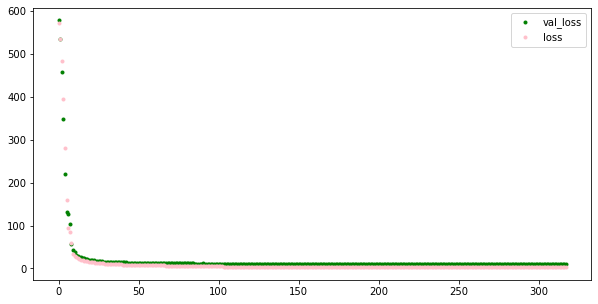

실제가격 : 19.3000, 예상가격 : 21.1559
실제가격 : 43.8000, 예상가격 : 39.0200
실제가격 : 23.0000, 예상가격 : 26.2151
실제가격 : 25.0000, 예상가격 : 26.4594
실제가격 : 18.9000, 예상가격 : 16.8488
실제가격 : 34.9000, 예상가격 : 35.8507
실제가격 : 21.7000, 예상가격 : 21.3324
실제가격 : 18.2000, 예상가격 : 19.7071
실제가격 : 18.2000, 예상가격 : 17.2153
실제가격 : 16.3000, 예상가격 : 16.5020


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)


#######################
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.01))

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

modelpath = '.model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1,save_best_only = True)

history = model.fit(x_train, y_train, validation_split=0.33, epochs=3500, batch_size=50, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])
hist = pd.DataFrame(history.history)

#테스트셋으로 실험 오차값 저장
y_loss = history.history['loss']
#학습셋으로 정확도 값 저장
y_vloss = history.history['val_loss']
#x값을 지저앟고 정확도를 파란색, 오차를 빨간색
x_len = np.arange(len(y_loss))
plt.figure(figsize=(10,5))
plt.plot(x_len, y_vloss, "o", c="green", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="pink", markersize=3, label='loss')
plt.legend()
plt.show()

y_predict = model.predict(x_test).flatten() # 값을 flatten으로 균일하게 넣는다.

for i in range(10):
    label = y_test[i]
    prediction = y_predict[i]
    print("실제가격 : %.4f, 예상가격 : %.4f" %(label, prediction))

2.4744029534490486


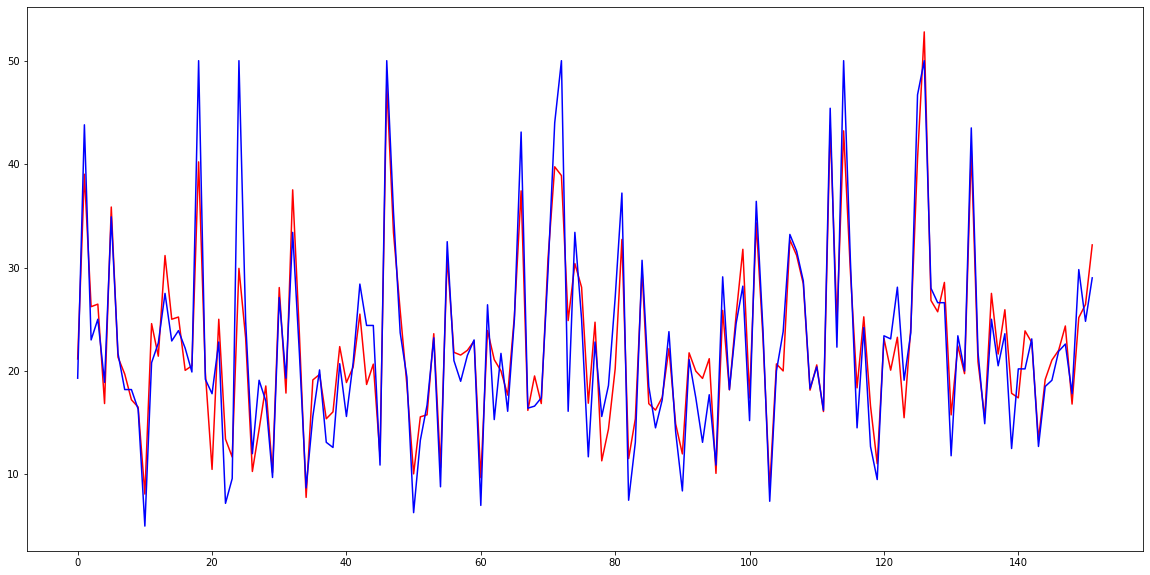

In [45]:
plt.figure(figsize=(20,10))
plt.plot(y_predict, c='red')
plt.plot(y_test, c='blue')

avr = abs(y_predict - y_test).mean()
print(avr)